In [13]:
import torch as tc
import numpy as np
from torch.autograd import Variable
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# 1. CNN

![optional caption text](Figures/CNNArchitecture.jpg)
(http://parse.ele.tue.nl/cluster/2/CNNArchitecture.jpg)

In [317]:
test_conv = tc.nn.Conv2d(1,1, kernel_size=3, stride=1, padding=0)

In [318]:
test_conv.weight.data


(0 ,0 ,.,.) = 
  0.2743 -0.1344 -0.0945
  0.1882  0.1721  0.1915
 -0.3011 -0.1853  0.1861
[torch.FloatTensor of size 1x1x3x3]

In [319]:
test_conv.weight.data = tc.Tensor([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

In [320]:
test_conv.weight

Parameter containing:
-1 -1 -1
-1  8 -1
-1 -1 -1
[torch.FloatTensor of size 3x3]

In [321]:
test_pic = train_dataset.train_data[0]

In [341]:
test_conv(data)

RuntimeError: Expected 4-dimensional input for 4-dimensional weight [3, 3], but got input of size [32, 1, 28, 28] instead

In [ ]:
self.conv1 = tc.nn.Conv2d(1, 10, kernel_size=5)

torch.Size([32, 1, 28, 28])

## 1.2 Convolution

Convolve the filter with the image (i.e., slide over the image spatially, computing **dot products**).

We are going to look at only small portion of image at once; In other words, we look at **patch** via **filter (also called "kernel" or "feature detector")**.
Each element in a filter is a weight. You can consider filter as a **weight vector for a patch.**

We move filter at each time, and the length of the distance we move the filter is called **stride.**

We can add **padding** by adding certain constant to the boundaries of images. It is often called **zero-padding** because we use zero as the value for the padding.

As a result of application of filter to an image, you get a **feature map (or activation map).**




After applying convolutional layer, apply **pooling layer** to reduce the amount of information. There are mainly two kinds of poolings:
1. Max pooling
2. Average pooling.

### The advantage of using convolutional neural net:
1. the size of weight matrix is smaller than fully connected net
2. more flexible to handle images.
![optional](Figures/cnn1.png)

In [342]:
class Net(tc.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # You can also do
        # super().__init__()
        self.conv1 = tc.nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = tc.nn.Conv2d(10, 20, kernel_size=5)
        self.mp = tc.nn.MaxPool2d(2)
        
        self.relu = tc.nn.functional.relu
        self.fc = tc.nn.Linear(320,10)
        # self.fc = tc.nn.Linear(??,10)
        # In order to determine what should go in ??, you can either use
        ## 1. Error: If you put ??, you'll run into a RuntimeError:size mismatch, m1:[64x320], m2:[100x10]
        ## and "320" is the number that should go into ??.
        ## 2. x.size: You can print(x.size) and check the size of x.
        self.log_softmax = tc.nn.functional.log_softmax
        
        
    def forward(self, x):
        in_size = x.size(0)
        x = self.conv1(x)
        x = self.relu(self.mp(x))
        x = self.conv2(x)
        x = self.relu(self.mp(x))
        x = x.view(in_size, -1)
        x = self.fc(x)
        return self.log_softmax(x)

In [343]:
data.size() # [0]: Batch size, 1: Number of channels, 28*28: Input size

torch.Size([32, 1, 28, 28])

In [344]:
train_dataset = datasets.MNIST(root="./Data/MNIST/", train=True,
#                                transform=transforms.Compose([transforms.ToTensor()]))
                               transform=transforms.Compose([transforms.ToTensor(),
                                                             transforms.Normalize((0.13066062, ), (0.30810776, ))]))
test_dataset = datasets.MNIST(root="./Data/MNIST/", train=False,
                              transform=transforms.Compose([transforms.ToTensor(),
                                                             transforms.Normalize((0.13066062, ), (0.30810776, ))]))
train_loader = DataLoader(dataset=train_dataset, shuffle = True, batch_size=64)
test_loader = DataLoader(dataset=test_dataset, shuffle=False, batch_size=64)

In [345]:
# model = Net()
# criterion = tc.nn.BCELoss()
# optimizer = tc.optim.Adam(model.parameters(), lr=0.01)

model = Net()
criterion = tc.nn.CrossEntropyLoss()
# CHOICE OF CRITERION IS VERY IMPORTANT!!!
# criterion = tc.nn.BCELoss() does not work.
optimizer = tc.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [346]:
traTodef train(epoch):
    model.train()
    for batch_idx, (data, label) in enumerate(train_loader):
        data, label = Variable(data), Variable(label)
        pred_label = model(data)
        loss = criterion(pred_label, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_idx % 10 == 0:
            print('Train Epoch: {} Batch Index: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'
                 .format(epoch, batch_idx, batch_idx*len(data), len(train_loader.dataset), 100.*batch_idx/len(train_loader),
                 loss.data[0]))

In [347]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, label in test_loader:
        data, label = Variable(data), Variable(label)
        pred_label = model(data)
        test_loss += criterion(pred_label, label).data[0]
#         test_loss += tc.nn.functional.nll_loss(pred_label, label).data[0]
                
        pred = pred_label.data.max(1, keepdim=True)[1]
        correct += pred.eq(label.data.view_as(pred)).cpu().sum()
        
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [388]:
pred_label.data.max(1, keepdim=True)[0]


1.00000e-03 *
 -0.9056
 -0.6322
 -0.0044
 -0.0253
 -0.1299
 -0.0084
 -0.2233
 -0.2742
 -0.9980
 -0.0754
 -0.4945
 -0.0054
 -1.6616
 -0.0100
 -0.3715
 -0.0337
[torch.FloatTensor of size 16x1]

In [351]:
for epoch in range(2):
    train(epoch)
    model.eval()
    test_loss = 0
    correct = 0

    for data, label in test_loader:
        data, label = Variable(data), Variable(label)
        pred_label = model(data)
        test_loss += criterion(pred_label, label).data[0]
#         test_loss += tc.nn.functional.nll_loss(pred_label, label).data[0]
                
        pred = pred_label.data.max(1, keepdim=True)[1]
        correct += pred.eq(label.data.view_as(pred)).cpu().sum()
        
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

/home/sewook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 0 Batch Index: 0 [0/60000 (0%)]	Loss: 0.016593
Train Epoch: 0 Batch Index: 10 [640/60000 (1%)]	Loss: 0.040706
Train Epoch: 0 Batch Index: 20 [1280/60000 (2%)]	Loss: 0.205147
Train Epoch: 0 Batch Index: 30 [1920/60000 (3%)]	Loss: 0.032853
Train Epoch: 0 Batch Index: 40 [2560/60000 (4%)]	Loss: 0.108832
Train Epoch: 0 Batch Index: 50 [3200/60000 (5%)]	Loss: 0.047786
Train Epoch: 0 Batch Index: 60 [3840/60000 (6%)]	Loss: 0.044371
Train Epoch: 0 Batch Index: 70 [4480/60000 (7%)]	Loss: 0.017657
Train Epoch: 0 Batch Index: 80 [5120/60000 (9%)]	Loss: 0.053177
Train Epoch: 0 Batch Index: 90 [5760/60000 (10%)]	Loss: 0.070906
Train Epoch: 0 Batch Index: 100 [6400/60000 (11%)]	Loss: 0.060133
Train Epoch: 0 Batch Index: 110 [7040/60000 (12%)]	Loss: 0.046972
Train Epoch: 0 Batch Index: 120 [7680/60000 (13%)]	Loss: 0.045203
Train Epoch: 0 Batch Index: 130 [8320/60000 (14%)]	Loss: 0.051682
Train Epoch: 0 Batch Index: 140 [8960/60000 (15%)]	Loss: 0.051221
Train Epoch: 0 Batch Index: 150 [9

Train Epoch: 1 Batch Index: 300 [19200/60000 (32%)]	Loss: 0.009732
Train Epoch: 1 Batch Index: 310 [19840/60000 (33%)]	Loss: 0.023860
Train Epoch: 1 Batch Index: 320 [20480/60000 (34%)]	Loss: 0.033005
Train Epoch: 1 Batch Index: 330 [21120/60000 (35%)]	Loss: 0.025537
Train Epoch: 1 Batch Index: 340 [21760/60000 (36%)]	Loss: 0.139368
Train Epoch: 1 Batch Index: 350 [22400/60000 (37%)]	Loss: 0.011287
Train Epoch: 1 Batch Index: 360 [23040/60000 (38%)]	Loss: 0.049648
Train Epoch: 1 Batch Index: 370 [23680/60000 (39%)]	Loss: 0.087611
Train Epoch: 1 Batch Index: 380 [24320/60000 (41%)]	Loss: 0.024162
Train Epoch: 1 Batch Index: 390 [24960/60000 (42%)]	Loss: 0.063562
Train Epoch: 1 Batch Index: 400 [25600/60000 (43%)]	Loss: 0.027200
Train Epoch: 1 Batch Index: 410 [26240/60000 (44%)]	Loss: 0.145244
Train Epoch: 1 Batch Index: 420 [26880/60000 (45%)]	Loss: 0.025795
Train Epoch: 1 Batch Index: 430 [27520/60000 (46%)]	Loss: 0.028790
Train Epoch: 1 Batch Index: 440 [28160/60000 (47%)]	Loss: 0.03

In [272]:
for epoch in range(2):
    train(epoch)
    test()

/home/sewook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 0 Batch Index: 0 [0/60000 (0%)]	Loss: 2.302660
Train Epoch: 0 Batch Index: 10 [640/60000 (1%)]	Loss: 2.202559
Train Epoch: 0 Batch Index: 20 [1280/60000 (2%)]	Loss: 2.005182
Train Epoch: 0 Batch Index: 30 [1920/60000 (3%)]	Loss: 1.783340
Train Epoch: 0 Batch Index: 40 [2560/60000 (4%)]	Loss: 1.254794
Train Epoch: 0 Batch Index: 50 [3200/60000 (5%)]	Loss: 0.805247
Train Epoch: 0 Batch Index: 60 [3840/60000 (6%)]	Loss: 0.695996
Train Epoch: 0 Batch Index: 70 [4480/60000 (7%)]	Loss: 0.625212
Train Epoch: 0 Batch Index: 80 [5120/60000 (9%)]	Loss: 0.531429
Train Epoch: 0 Batch Index: 90 [5760/60000 (10%)]	Loss: 0.556887
Train Epoch: 0 Batch Index: 100 [6400/60000 (11%)]	Loss: 0.572285
Train Epoch: 0 Batch Index: 110 [7040/60000 (12%)]	Loss: 0.516710
Train Epoch: 0 Batch Index: 120 [7680/60000 (13%)]	Loss: 0.339140
Train Epoch: 0 Batch Index: 130 [8320/60000 (14%)]	Loss: 0.272959
Train Epoch: 0 Batch Index: 140 [8960/60000 (15%)]	Loss: 0.310859
Train Epoch: 0 Batch Index: 150 [9

Train Epoch: 1 Batch Index: 300 [19200/60000 (32%)]	Loss: 0.103039
Train Epoch: 1 Batch Index: 310 [19840/60000 (33%)]	Loss: 0.217551
Train Epoch: 1 Batch Index: 320 [20480/60000 (34%)]	Loss: 0.076564
Train Epoch: 1 Batch Index: 330 [21120/60000 (35%)]	Loss: 0.082625
Train Epoch: 1 Batch Index: 340 [21760/60000 (36%)]	Loss: 0.153190
Train Epoch: 1 Batch Index: 350 [22400/60000 (37%)]	Loss: 0.083155
Train Epoch: 1 Batch Index: 360 [23040/60000 (38%)]	Loss: 0.100240
Train Epoch: 1 Batch Index: 370 [23680/60000 (39%)]	Loss: 0.029560
Train Epoch: 1 Batch Index: 380 [24320/60000 (41%)]	Loss: 0.058061
Train Epoch: 1 Batch Index: 390 [24960/60000 (42%)]	Loss: 0.038924
Train Epoch: 1 Batch Index: 400 [25600/60000 (43%)]	Loss: 0.051424
Train Epoch: 1 Batch Index: 410 [26240/60000 (44%)]	Loss: 0.069349
Train Epoch: 1 Batch Index: 420 [26880/60000 (45%)]	Loss: 0.064964
Train Epoch: 1 Batch Index: 430 [27520/60000 (46%)]	Loss: 0.090960
Train Epoch: 1 Batch Index: 440 [28160/60000 (47%)]	Loss: 0.10

In [37]:
list(model.conv1.parameters())

[Parameter containing:
 (0 ,0 ,.,.) = 
   0.3127  0.1401 -0.2018 -0.0476 -0.2824
   0.3564  0.3007 -0.1697 -0.0580 -0.2853
   0.3949  0.0490  0.0847 -0.0594 -0.2132
   0.1137 -0.0060 -0.1114 -0.0455  0.1683
   0.2790 -0.1163  0.1801  0.0126  0.1027
 
 (1 ,0 ,.,.) = 
  -0.1627 -0.1426 -0.0252  0.0871  0.0440
  -0.1197  0.1274  0.0922  0.1821  0.1087
   0.0767 -0.0091 -0.0525 -0.0706  0.0697
  -0.0432 -0.2041 -0.1193 -0.1040 -0.1573
  -0.1797 -0.0202  0.0905 -0.1914  0.0503
 
 (2 ,0 ,.,.) = 
   0.0102 -0.0861  0.0283  0.1618  0.0507
  -0.1606 -0.1584  0.0504  0.0989 -0.0493
   0.0317 -0.0125  0.2579  0.2488  0.3129
  -0.0512 -0.0049  0.0505  0.3004  0.0736
  -0.1932 -0.1264 -0.2154  0.1392 -0.0242
 
 (3 ,0 ,.,.) = 
   0.1422  0.0804 -0.1532 -0.1251 -0.1750
  -0.0378 -0.1734 -0.0813 -0.2210 -0.1890
   0.1496 -0.1373  0.0979 -0.2057 -0.1618
   0.0071 -0.0243 -0.1714 -0.1496  0.1344
   0.1487 -0.1266 -0.1988  0.0667 -0.1823
 
 (4 ,0 ,.,.) = 
  -0.1927 -0.0254  0.1556 -0.1744 -0.0718
   0.04

In [92]:
import matplotlib.pyplot as plt
import numpy as np

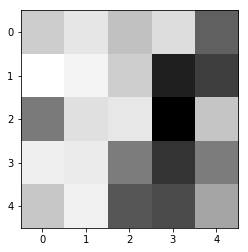

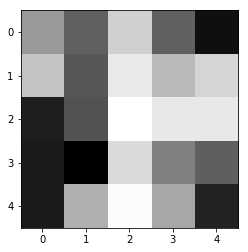

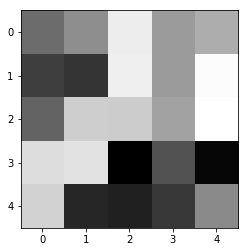

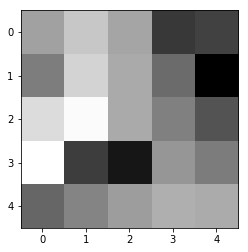

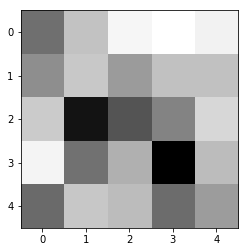

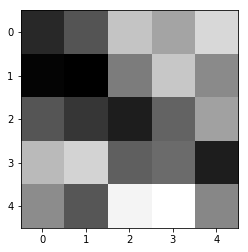

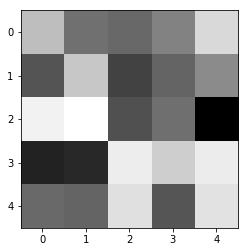

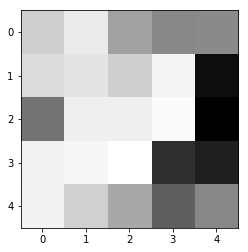

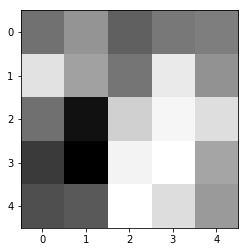

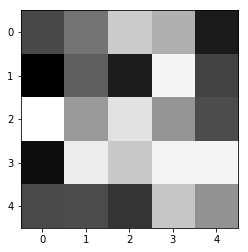

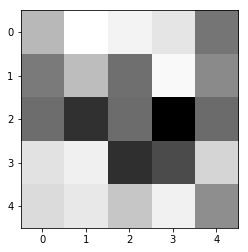

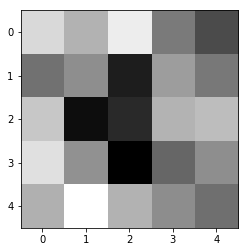

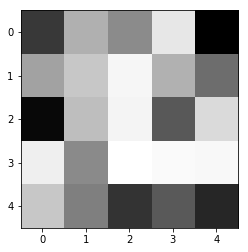

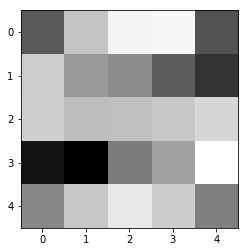

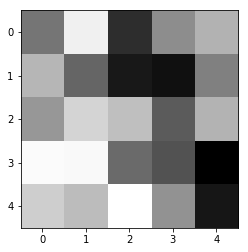

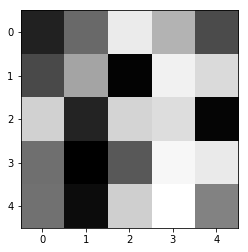

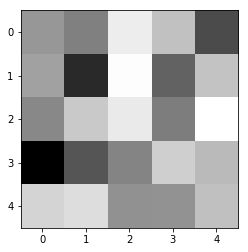

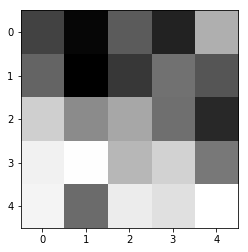

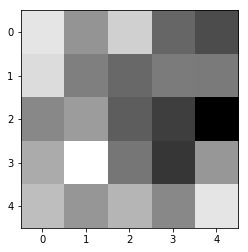

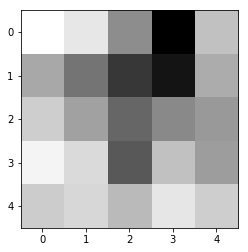

In [96]:
for i in model.conv2.weight:
    to_pic = i.data.numpy()
    to_pic = to_pic[0]
    plt.imshow(to_pic.tolist(), cmap=plt.get_cmap("Greys"))
    plt.show()

In [98]:
train_dataset = datasets.CIFAR10(root="./Data/CIFAR10/", train=True,
#                                transform=transforms.Compose([transforms.ToTensor()]))
                               transform=transforms.Compose([transforms.ToTensor(),
                                                             transforms.Normalize((0.13066062, ), (0.30810776, ))]), download=True)
test_dataset = datasets.CIFAR10(root="./Data/CIFAR10/", train=False,
                              transform=transforms.Compose([transforms.ToTensor(),
                                                             transforms.Normalize((0.13066062, ), (0.30810776, ))]))
train_loader = DataLoader(dataset=train_dataset, shuffle = True, batch_size=64, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, shuffle=False, batch_size=64)

In [110]:
class Net(tc.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # You can also do
        # super().__init__()
        self.conv1 = tc.nn.Conv2d(3, 10, kernel_size=5)
        self.conv2 = tc.nn.Conv2d(10, 20, kernel_size=5)
        self.mp = tc.nn.MaxPool2d(2)
        
        self.relu = tc.nn.functional.relu
        self.fc = tc.nn.Linear(500,10)
        # self.fc = tc.nn.Linear(??,10)
        # In order to determine what should go in ??, you can either use
        ## 1. Error: If you put ??, you'll run into a RuntimeError:size mismatch, m1:[64x320], m2:[100x10]
        ## and "320" is the number that should go into ??.
        ## 2. x.size: You can print(x.size) and check the size of x.
        self.log_softmax = tc.nn.functional.log_softmax
        
        
    def forward(self, x):
        in_size = x.size(0)
        x = self.conv1(x)
        x = self.relu(self.mp(x))
        x = self.conv2(x)
        x = self.relu(self.mp(x))
        x = x.view(in_size, -1)
        x = self.fc(x)
        return self.log_softmax(x)

In [111]:
# model = Net()
# criterion = tc.nn.BCELoss()
# optimizer = tc.optim.Adam(model.parameters(), lr=0.01)

model = Net()
criterion = tc.nn.CrossEntropyLoss()
# CHOICE OF CRITERION IS VERY IMPORTANT!!!
# criterion = tc.nn.BCELoss() does not work.
optimizer = tc.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [112]:
def train(epoch):
    model.train()
    for batch_idx, (data, label) in enumerate(train_loader):
        data, label = Variable(data), Variable(label)
        pred_label = model(data)
        loss = criterion(pred_label, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_idx % 10 == 0:
            print('Train Epoch: {} Batch Index: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'
                 .format(epoch, batch_idx, batch_idx*len(data), len(train_loader.dataset), 100.*batch_idx/len(train_loader),
                 loss.data[0]))

In [113]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    for data, label in test_loader:
        data, label = Variable(data, volatile=True), Variable(label)
        pred_label = model(data)
        test_loss += criterion(pred_label, label).data[0]
#         test_loss += tc.nn.functional.nll_loss(pred_label, label).data[0]
                
        pred = pred_label.data.max(1, keepdim=True)[1]
        correct += pred.eq(label.data.view_as(pred)).cpu().sum()
        
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [115]:
for epoch in range(10):
    train(epoch)
    test()

/home/sewook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 0 Batch Index: 0 [0/50000 (0%)]	Loss: 1.555510
Train Epoch: 0 Batch Index: 10 [640/50000 (1%)]	Loss: 1.521936
Train Epoch: 0 Batch Index: 20 [1280/50000 (3%)]	Loss: 1.262119
Train Epoch: 0 Batch Index: 30 [1920/50000 (4%)]	Loss: 1.349291
Train Epoch: 0 Batch Index: 40 [2560/50000 (5%)]	Loss: 1.463815
Train Epoch: 0 Batch Index: 50 [3200/50000 (6%)]	Loss: 1.520654
Train Epoch: 0 Batch Index: 60 [3840/50000 (8%)]	Loss: 1.330106
Train Epoch: 0 Batch Index: 70 [4480/50000 (9%)]	Loss: 1.697188
Train Epoch: 0 Batch Index: 80 [5120/50000 (10%)]	Loss: 1.469044
Train Epoch: 0 Batch Index: 90 [5760/50000 (12%)]	Loss: 1.212342
Train Epoch: 0 Batch Index: 100 [6400/50000 (13%)]	Loss: 1.542048
Train Epoch: 0 Batch Index: 110 [7040/50000 (14%)]	Loss: 1.486834
Train Epoch: 0 Batch Index: 120 [7680/50000 (15%)]	Loss: 1.277457
Train Epoch: 0 Batch Index: 130 [8320/50000 (17%)]	Loss: 1.529354
Train Epoch: 0 Batch Index: 140 [8960/50000 (18%)]	Loss: 1.722840
Train Epoch: 0 Batch Index: 150 [

Train Epoch: 1 Batch Index: 440 [28160/50000 (56%)]	Loss: 1.652262
Train Epoch: 1 Batch Index: 450 [28800/50000 (58%)]	Loss: 1.360135
Train Epoch: 1 Batch Index: 460 [29440/50000 (59%)]	Loss: 1.353864
Train Epoch: 1 Batch Index: 470 [30080/50000 (60%)]	Loss: 1.225593
Train Epoch: 1 Batch Index: 480 [30720/50000 (61%)]	Loss: 1.336108
Train Epoch: 1 Batch Index: 490 [31360/50000 (63%)]	Loss: 1.181009
Train Epoch: 1 Batch Index: 500 [32000/50000 (64%)]	Loss: 1.352192
Train Epoch: 1 Batch Index: 510 [32640/50000 (65%)]	Loss: 1.213994
Train Epoch: 1 Batch Index: 520 [33280/50000 (66%)]	Loss: 1.101439
Train Epoch: 1 Batch Index: 530 [33920/50000 (68%)]	Loss: 1.512585
Train Epoch: 1 Batch Index: 540 [34560/50000 (69%)]	Loss: 1.238762
Train Epoch: 1 Batch Index: 550 [35200/50000 (70%)]	Loss: 1.417632
Train Epoch: 1 Batch Index: 560 [35840/50000 (72%)]	Loss: 1.207320
Train Epoch: 1 Batch Index: 570 [36480/50000 (73%)]	Loss: 1.158466
Train Epoch: 1 Batch Index: 580 [37120/50000 (74%)]	Loss: 1.17

Train Epoch: 3 Batch Index: 80 [5120/50000 (10%)]	Loss: 1.270485
Train Epoch: 3 Batch Index: 90 [5760/50000 (12%)]	Loss: 1.249776
Train Epoch: 3 Batch Index: 100 [6400/50000 (13%)]	Loss: 1.303992
Train Epoch: 3 Batch Index: 110 [7040/50000 (14%)]	Loss: 1.336601
Train Epoch: 3 Batch Index: 120 [7680/50000 (15%)]	Loss: 1.240066
Train Epoch: 3 Batch Index: 130 [8320/50000 (17%)]	Loss: 1.361781
Train Epoch: 3 Batch Index: 140 [8960/50000 (18%)]	Loss: 1.362075
Train Epoch: 3 Batch Index: 150 [9600/50000 (19%)]	Loss: 1.155172
Train Epoch: 3 Batch Index: 160 [10240/50000 (20%)]	Loss: 1.102123
Train Epoch: 3 Batch Index: 170 [10880/50000 (22%)]	Loss: 1.308635
Train Epoch: 3 Batch Index: 180 [11520/50000 (23%)]	Loss: 1.051864
Train Epoch: 3 Batch Index: 190 [12160/50000 (24%)]	Loss: 1.171741
Train Epoch: 3 Batch Index: 200 [12800/50000 (26%)]	Loss: 1.097371
Train Epoch: 3 Batch Index: 210 [13440/50000 (27%)]	Loss: 1.419156
Train Epoch: 3 Batch Index: 220 [14080/50000 (28%)]	Loss: 1.530375
Train

Train Epoch: 4 Batch Index: 520 [33280/50000 (66%)]	Loss: 1.015152
Train Epoch: 4 Batch Index: 530 [33920/50000 (68%)]	Loss: 1.143649
Train Epoch: 4 Batch Index: 540 [34560/50000 (69%)]	Loss: 1.006521
Train Epoch: 4 Batch Index: 550 [35200/50000 (70%)]	Loss: 1.427323
Train Epoch: 4 Batch Index: 560 [35840/50000 (72%)]	Loss: 1.046479
Train Epoch: 4 Batch Index: 570 [36480/50000 (73%)]	Loss: 1.127003
Train Epoch: 4 Batch Index: 580 [37120/50000 (74%)]	Loss: 1.029791
Train Epoch: 4 Batch Index: 590 [37760/50000 (75%)]	Loss: 1.187112
Train Epoch: 4 Batch Index: 600 [38400/50000 (77%)]	Loss: 1.339647
Train Epoch: 4 Batch Index: 610 [39040/50000 (78%)]	Loss: 1.123722
Train Epoch: 4 Batch Index: 620 [39680/50000 (79%)]	Loss: 1.084890
Train Epoch: 4 Batch Index: 630 [40320/50000 (81%)]	Loss: 1.401927
Train Epoch: 4 Batch Index: 640 [40960/50000 (82%)]	Loss: 1.078529
Train Epoch: 4 Batch Index: 650 [41600/50000 (83%)]	Loss: 1.120590
Train Epoch: 4 Batch Index: 660 [42240/50000 (84%)]	Loss: 1.17

Train Epoch: 6 Batch Index: 160 [10240/50000 (20%)]	Loss: 1.198244
Train Epoch: 6 Batch Index: 170 [10880/50000 (22%)]	Loss: 1.334151
Train Epoch: 6 Batch Index: 180 [11520/50000 (23%)]	Loss: 0.767608
Train Epoch: 6 Batch Index: 190 [12160/50000 (24%)]	Loss: 1.145543
Train Epoch: 6 Batch Index: 200 [12800/50000 (26%)]	Loss: 1.060760
Train Epoch: 6 Batch Index: 210 [13440/50000 (27%)]	Loss: 1.122035
Train Epoch: 6 Batch Index: 220 [14080/50000 (28%)]	Loss: 1.101376
Train Epoch: 6 Batch Index: 230 [14720/50000 (29%)]	Loss: 1.221846
Train Epoch: 6 Batch Index: 240 [15360/50000 (31%)]	Loss: 0.822575
Train Epoch: 6 Batch Index: 250 [16000/50000 (32%)]	Loss: 1.198484
Train Epoch: 6 Batch Index: 260 [16640/50000 (33%)]	Loss: 1.348911
Train Epoch: 6 Batch Index: 270 [17280/50000 (35%)]	Loss: 1.171429
Train Epoch: 6 Batch Index: 280 [17920/50000 (36%)]	Loss: 0.932222
Train Epoch: 6 Batch Index: 290 [18560/50000 (37%)]	Loss: 1.242455
Train Epoch: 6 Batch Index: 300 [19200/50000 (38%)]	Loss: 1.30

Train Epoch: 7 Batch Index: 590 [37760/50000 (75%)]	Loss: 0.891896
Train Epoch: 7 Batch Index: 600 [38400/50000 (77%)]	Loss: 1.112137
Train Epoch: 7 Batch Index: 610 [39040/50000 (78%)]	Loss: 1.015315
Train Epoch: 7 Batch Index: 620 [39680/50000 (79%)]	Loss: 1.187000
Train Epoch: 7 Batch Index: 630 [40320/50000 (81%)]	Loss: 0.915128
Train Epoch: 7 Batch Index: 640 [40960/50000 (82%)]	Loss: 1.106315
Train Epoch: 7 Batch Index: 650 [41600/50000 (83%)]	Loss: 0.977586
Train Epoch: 7 Batch Index: 660 [42240/50000 (84%)]	Loss: 0.767320
Train Epoch: 7 Batch Index: 670 [42880/50000 (86%)]	Loss: 1.084303
Train Epoch: 7 Batch Index: 680 [43520/50000 (87%)]	Loss: 0.994633
Train Epoch: 7 Batch Index: 690 [44160/50000 (88%)]	Loss: 1.121025
Train Epoch: 7 Batch Index: 700 [44800/50000 (90%)]	Loss: 1.130288
Train Epoch: 7 Batch Index: 710 [45440/50000 (91%)]	Loss: 1.144197
Train Epoch: 7 Batch Index: 720 [46080/50000 (92%)]	Loss: 0.884200
Train Epoch: 7 Batch Index: 730 [46720/50000 (93%)]	Loss: 1.09

Train Epoch: 9 Batch Index: 230 [14720/50000 (29%)]	Loss: 1.030095
Train Epoch: 9 Batch Index: 240 [15360/50000 (31%)]	Loss: 1.074751
Train Epoch: 9 Batch Index: 250 [16000/50000 (32%)]	Loss: 1.101641
Train Epoch: 9 Batch Index: 260 [16640/50000 (33%)]	Loss: 1.290207
Train Epoch: 9 Batch Index: 270 [17280/50000 (35%)]	Loss: 0.975096
Train Epoch: 9 Batch Index: 280 [17920/50000 (36%)]	Loss: 1.136925
Train Epoch: 9 Batch Index: 290 [18560/50000 (37%)]	Loss: 0.996748
Train Epoch: 9 Batch Index: 300 [19200/50000 (38%)]	Loss: 1.017581
Train Epoch: 9 Batch Index: 310 [19840/50000 (40%)]	Loss: 0.898535
Train Epoch: 9 Batch Index: 320 [20480/50000 (41%)]	Loss: 1.307690
Train Epoch: 9 Batch Index: 330 [21120/50000 (42%)]	Loss: 0.854035
Train Epoch: 9 Batch Index: 340 [21760/50000 (43%)]	Loss: 1.410270
Train Epoch: 9 Batch Index: 350 [22400/50000 (45%)]	Loss: 1.222240
Train Epoch: 9 Batch Index: 360 [23040/50000 (46%)]	Loss: 0.964637
Train Epoch: 9 Batch Index: 370 [23680/50000 (47%)]	Loss: 1.03

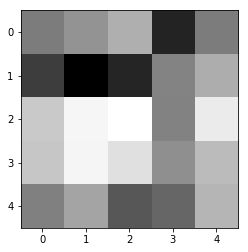

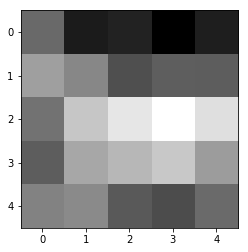

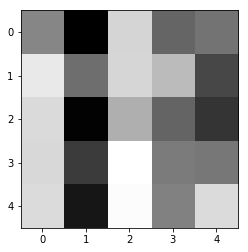

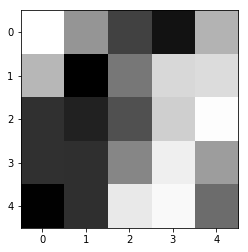

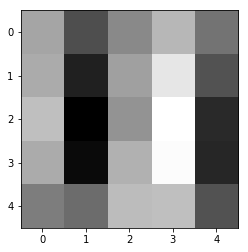

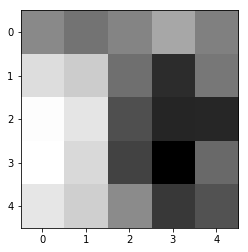

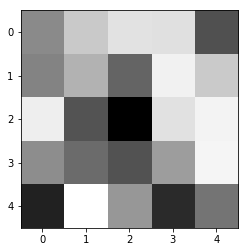

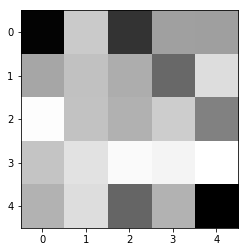

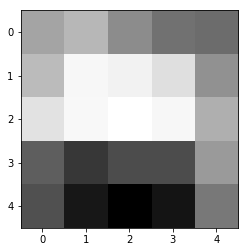

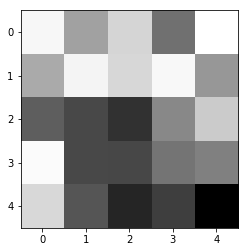

In [179]:
for i in model.conv1.weight.data:
    plt.imshow(i[0].numpy(), cmap=plt.get_cmap("Greys"))
    plt.show()

In [169]:
model.conv1.weight.data[0]


(0 ,.,.) = 
  0.0500  0.0061 -0.0415  0.2021  0.0506
  0.1655  0.2683  0.1997  0.0359 -0.0384
 -0.0942 -0.2235 -0.2649  0.0390 -0.1849
 -0.0875 -0.2231 -0.1516  0.0142 -0.0621
  0.0416 -0.0224  0.1230  0.0926 -0.0508

(1 ,.,.) = 
 -0.1166  0.0200  0.0653 -0.1220 -0.0240
  0.1007  0.1497 -0.0619  0.1079  0.0110
  0.0099 -0.0737 -0.0115 -0.1028  0.0911
 -0.0371  0.0318 -0.0542 -0.0516 -0.0152
  0.1763  0.1163  0.0332  0.1284  0.1429

(2 ,.,.) = 
 -0.1620 -0.2013 -0.1268  0.0348 -0.1757
 -0.0071  0.1309 -0.0961 -0.0291 -0.1260
 -0.0685  0.0519 -0.1137 -0.0546 -0.1447
 -0.1141 -0.0208  0.0614 -0.0056 -0.0600
  0.0657  0.1695  0.1675  0.1087  0.1155
[torch.FloatTensor of size 3x5x5]

In [135]:
model.conv1.weight.data[0][0].numpy()

array([[ 0.04996392,  0.00612002, -0.04154245,  0.20214038,  0.05059422],
       [ 0.16550139,  0.26827693,  0.19968008,  0.03593087, -0.03838393],
       [-0.09415802, -0.22350806, -0.26493239,  0.039026  , -0.18487442],
       [-0.08754699, -0.22308339, -0.15158325,  0.01415948, -0.06210069],
       [ 0.04159237, -0.02242967,  0.12297854,  0.092595  , -0.05076736]], dtype=float32)

# 2. Advanced CNN

## 2.1 Inception modules

When not know which size of filter to choose, **use all different filters at the same time.**

You use $1\times1$ filter because **it reduces the number of operations to a huge extent.**

<img align="left" src="./Figures/noreduce.png" width=450>
<img align="left" src="./Figures/reduced1.png"width=450>

<!-- ![optional](./Figures/noreduce.png)![optional](./Figures/reduced1.png) -->

### Let's make an inception module
<img align="center" src="./Figures/inception_module.png"/>

In [95]:
class InceptionA(tc.nn.Module):
    def __init__(self, in_channels):
        super(InceptionA, self).__init__()
        
        self.branch_pool_1 = tc.nn.Conv2d(in_channels=in_channels, out_channels=24, kernel_size=1)
        
        self.branch1x1 = tc.nn.Conv2d(in_channels=in_channels, out_channels=16, kernel_size=1)
        
        self.branch5x5_1 = tc.nn.Conv2d(in_channels=in_channels, out_channels=16, kernel_size=1)
        self.branch5x5_2 = tc.nn.Conv2d(in_channels=16, out_channels=24, kernel_size=5, padding=2)
        
        self.branch3x3_1 = tc.nn.Conv2d(in_channels=in_channels, out_channels=16, kernel_size=1)
        self.branch3x3_2 = tc.nn.Conv2d(in_channels=16, out_channels=24, kernel_size=3, padding=1)
        self.branch3x3_3 = tc.nn.Conv2d(in_channels=24, out_channels=24, kernel_size=3, padding=1)

        
    def forward(self, x):
        branch_pool = self.branch_pool_1(tc.nn.functional.avg_pool2d(x, kernel_size=3, stride=1, padding=1))
        
        branch1x1 = self.branch1x1(x)
        branch5x5 = self.branch5x5_2(self.branch5x5_1(x))
        branch3x3 = self.branch3x3_3(self.branch3x3_2(self.branch3x3_1(x)))
        
        outputs = [branch_pool, branch1x1, branch5x5, branch3x3]
        return tc.cat(outputs, 1) # Concatenate output list

In [96]:
class Net(tc.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = tc.nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = tc.nn.Conv2d(88, 20, kernel_size=5)
        
        self.incept1 = InceptionA(in_channels=10)
        self.incept2 = InceptionA(in_channels=20)
        
        self.mp = tc.nn.MaxPool2d(2)
        self.fc = tc.nn.Linear(1408, 10)
        
    def forward(self, x):
        in_size = x.size(0) # size of batch
        print("x.size1: ", x.size())
        print("in_size: ", in_size)
        x = tc.nn.functional.relu(self.mp(self.conv1(x)))
        x = self.incept1(x)
        x = tc.nn.functional.relu(self.mp(self.conv2(x)))
        x = self.incept2(x)
        x = x.view(in_size, -1)
        print("x.size2: ", x.size())
        x = self.fc(x)
        return tc.nn.functional.log_softmax(x)
        

In [97]:
train_dataset = datasets.MNIST(root="./Data/MNIST_Data/", train=True,
           transform=transforms.Compose([transforms.ToTensor(),
                                         transforms.Normalize((0.13066062, ), (0.30810776, ))]), download=True)
test_dataset = datasets.MNIST(root="./Data/MNIST_Data/", train=False,
                              transform=transforms.Compose([transforms.ToTensor(),
                                         transforms.Normalize((0.13066062, ), (0.30810776, ))]))

train_loader = DataLoader(dataset=train_dataset, shuffle=True, batch_size=64, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, shuffle=False, batch_size=64, num_workers=2)

In [98]:
model = Net()
criterion = tc.nn.CrossEntropyLoss()
# CHOICE OF CRITERION IS VERY IMPORTANT!!!
# criterion = tc.nn.BCELoss() does not work.
optimizer = tc.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [99]:
def train(epoch):
    model.train()
    for batch_idx, (data, label) in enumerate(train_loader):
        data, label = Variable(data), Variable(label)
        pred_label = model(data)
        loss = criterion(pred_label, label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch_idx % 10 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'
                 .format(epoch, batch_idx*len(data), len(train_loader.dataset), 100.*batch_idx/len(train_loader),
                 loss.data[0]))

In [100]:
def test():
    model.eval()
    correct = 0
    test_loss = 0
    for data, label in test_loader:
        data, label = Variable(data, volatile=True), Variable(label)
        pred_label = model(data)
        test_loss += criterion(pred_label, label).data[0]
        
        pred = pred_label.data.max(1, keepdim=True)[1]
        correct += pred.eq(label.data.view_as(pred)).sum()
        
    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [101]:
for epoch in range(2):
    train(epoch)
    test()

x.size1:  torch.Size([64, 1, 28, 28])
in_size:  64
x.size2:  torch.Size([64, 1408])
Train Epoch: 0 [0/60000 (0%)]	Loss: 2.300683
x.size1:  torch.Size([64, 1, 28, 28])
in_size:  64


/home/sewook/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


x.size2:  torch.Size([64, 1408])
x.size1:  torch.Size([64, 1, 28, 28])
in_size:  64
x.size2:  torch.Size([64, 1408])
x.size1:  torch.Size([64, 1, 28, 28])
in_size:  64
x.size2:  torch.Size([64, 1408])
x.size1:  torch.Size([64, 1, 28, 28])
in_size:  64
x.size2:  torch.Size([64, 1408])
x.size1:  torch.Size([64, 1, 28, 28])
in_size:  64
x.size2:  torch.Size([64, 1408])
x.size1:  torch.Size([64, 1, 28, 28])
in_size:  64
x.size2:  torch.Size([64, 1408])
x.size1:  torch.Size([64, 1, 28, 28])
in_size:  64
x.size2:  torch.Size([64, 1408])
x.size1:  torch.Size([64, 1, 28, 28])
in_size:  64
x.size2:  torch.Size([64, 1408])
x.size1:  torch.Size([64, 1, 28, 28])
in_size:  64
x.size2:  torch.Size([64, 1408])
x.size1:  torch.Size([64, 1, 28, 28])
in_size:  64
x.size2:  torch.Size([64, 1408])
Train Epoch: 0 [640/60000 (1%)]	Loss: 2.292998
x.size1:  torch.Size([64, 1, 28, 28])
in_size:  64
x.size2:  torch.Size([64, 1408])
x.size1:  torch.Size([64, 1, 28, 28])
in_size:  64
x.size2:  torch.Size([64, 140

Process Process-63:
Traceback (most recent call last):
Process Process-64:
  File "/home/sewook/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/sewook/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/sewook/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/home/sewook/anaconda3/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 36, in _worker_loop
    r = index_queue.get()
  File "/home/sewook/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/sewook/anaconda3/lib/python3.6/multiprocessing/queues.py", line 334, in get
    with self._rlock:
  File "/home/sewook/anaconda3/lib/python3.6/multiprocessing/synchronize.py", line 96, in __enter__
    return self._semlock.__enter__()


KeyboardInterrupt: 